In [1]:
%pylab
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import itertools
from k_means import (K_MEANS, find_best_grouping)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


In [67]:
def plot_data(data, data_targets, data_labels, title, **args):
    size = data.shape[1]
    fig, axes = plt.subplots(size, size)
    for i in range(size):
        for j in range(size):
            if i == j:
                axes[i][i].hist(
                    data[:,i],
                    normed=None,
                    histtype='bar',
                    facecolor='blue',
                    alpha=0.75,
                    ec='black'
                )
                axes[i][0].set_ylabel(data_labels[i])
                axes[size-1][i].set_xlabel(data_labels[i])
            else:
                axes[i][j].scatter(data[:,i], data[:,j], c=data_targets)

    fig.set_size_inches(25, 25)
    plt.suptitle(title, fontsize=50)
    plt.show()

def plot_kmeans(data, data_tragets, data_labels, title, K=3, **args):
    r, grouping = K_MEANS(data, K)
    
    size = data.shape[1]
    fig, axes = plt.subplots(size, size)
    for i in range(size):
        for j in range(size):
            if i == j:
                axes[i][0].set_ylabel(data_labels[i])
                axes[size-1][i].set_xlabel(data_labels[i])
            else:
                axes[i][j].scatter(data[:,i], data[:,j], c=grouping)
                axes[i][j].scatter(r[:, i], r[:, j], marker='x' , c='r')

    fig.set_size_inches(25, 25)
    plt.suptitle(f'{title} grouped', fontsize=50)
    plt.show()
    
    

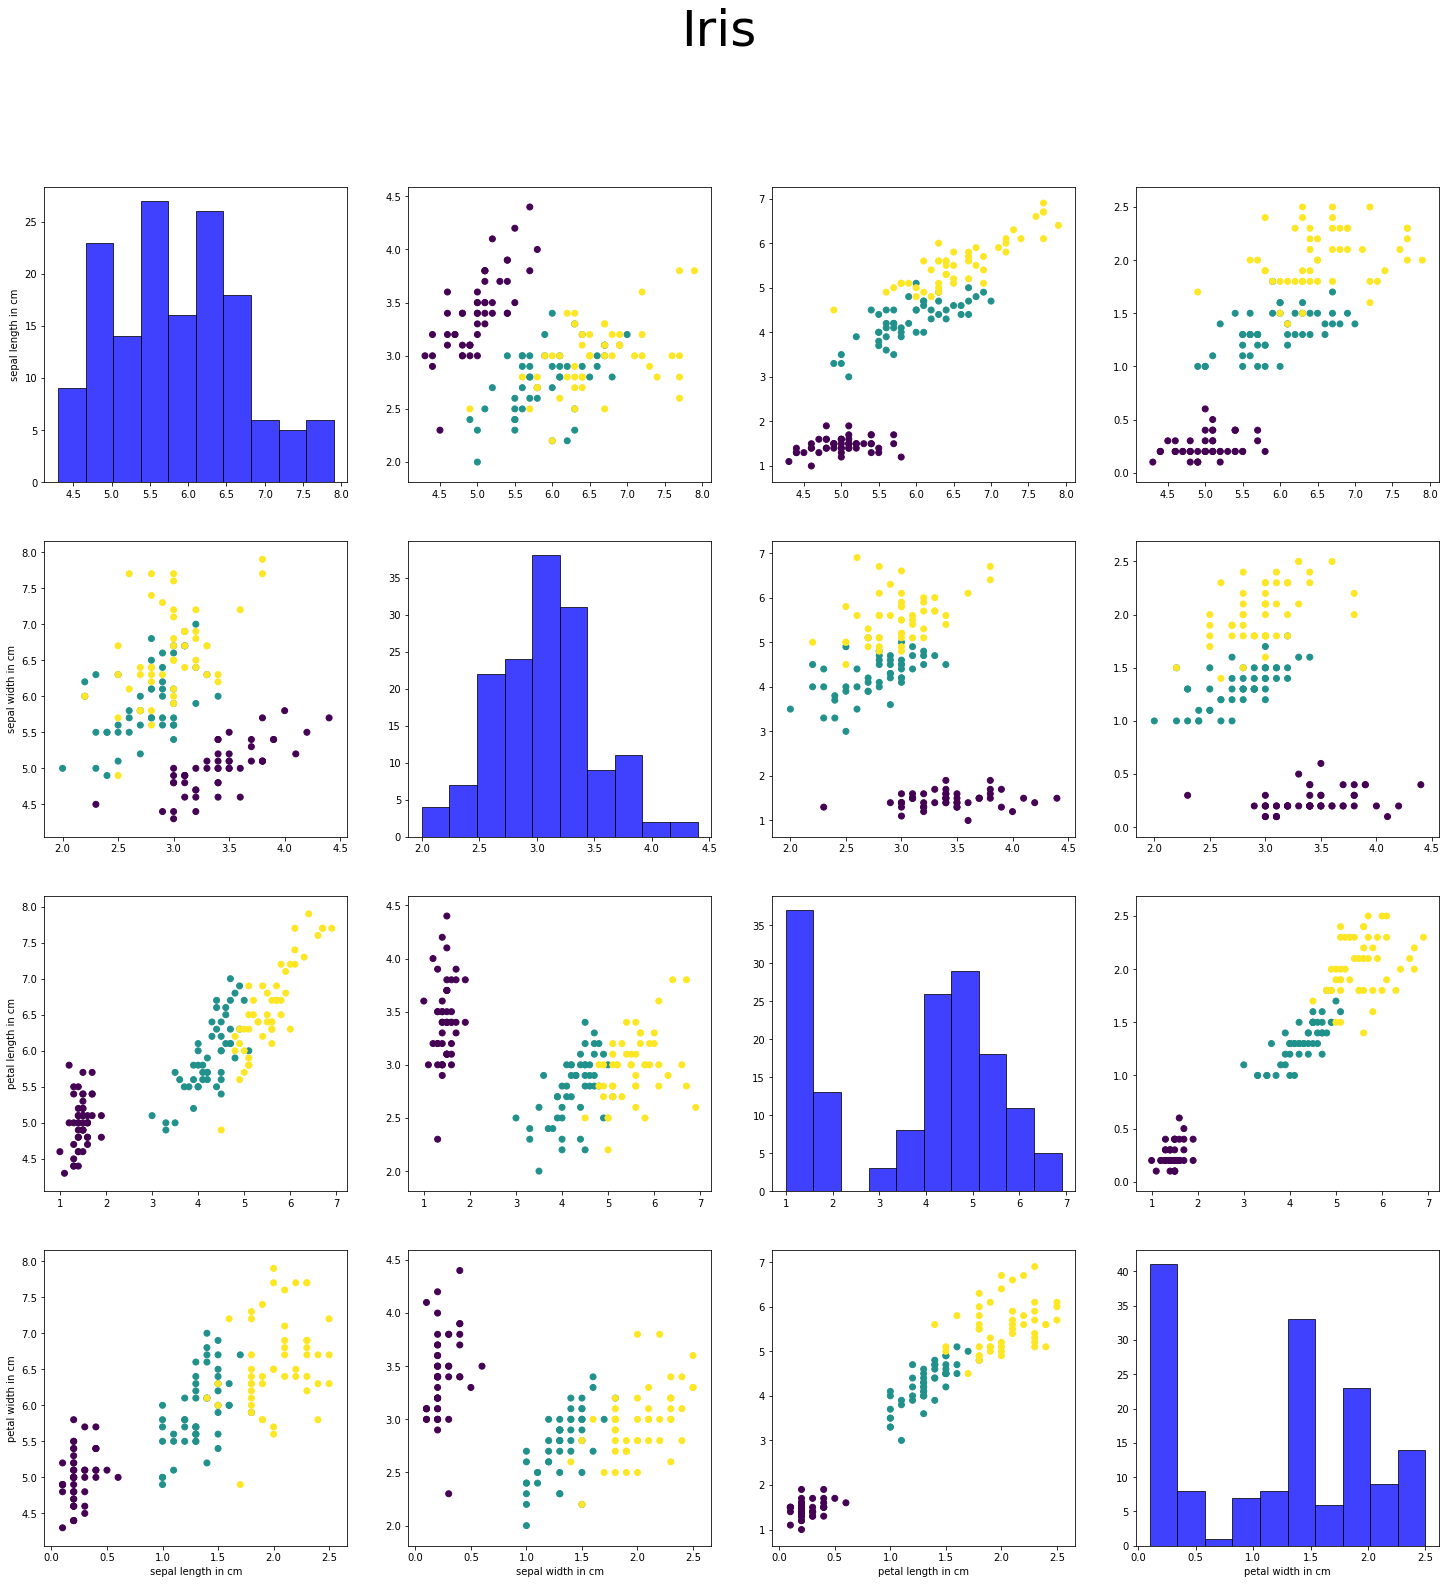

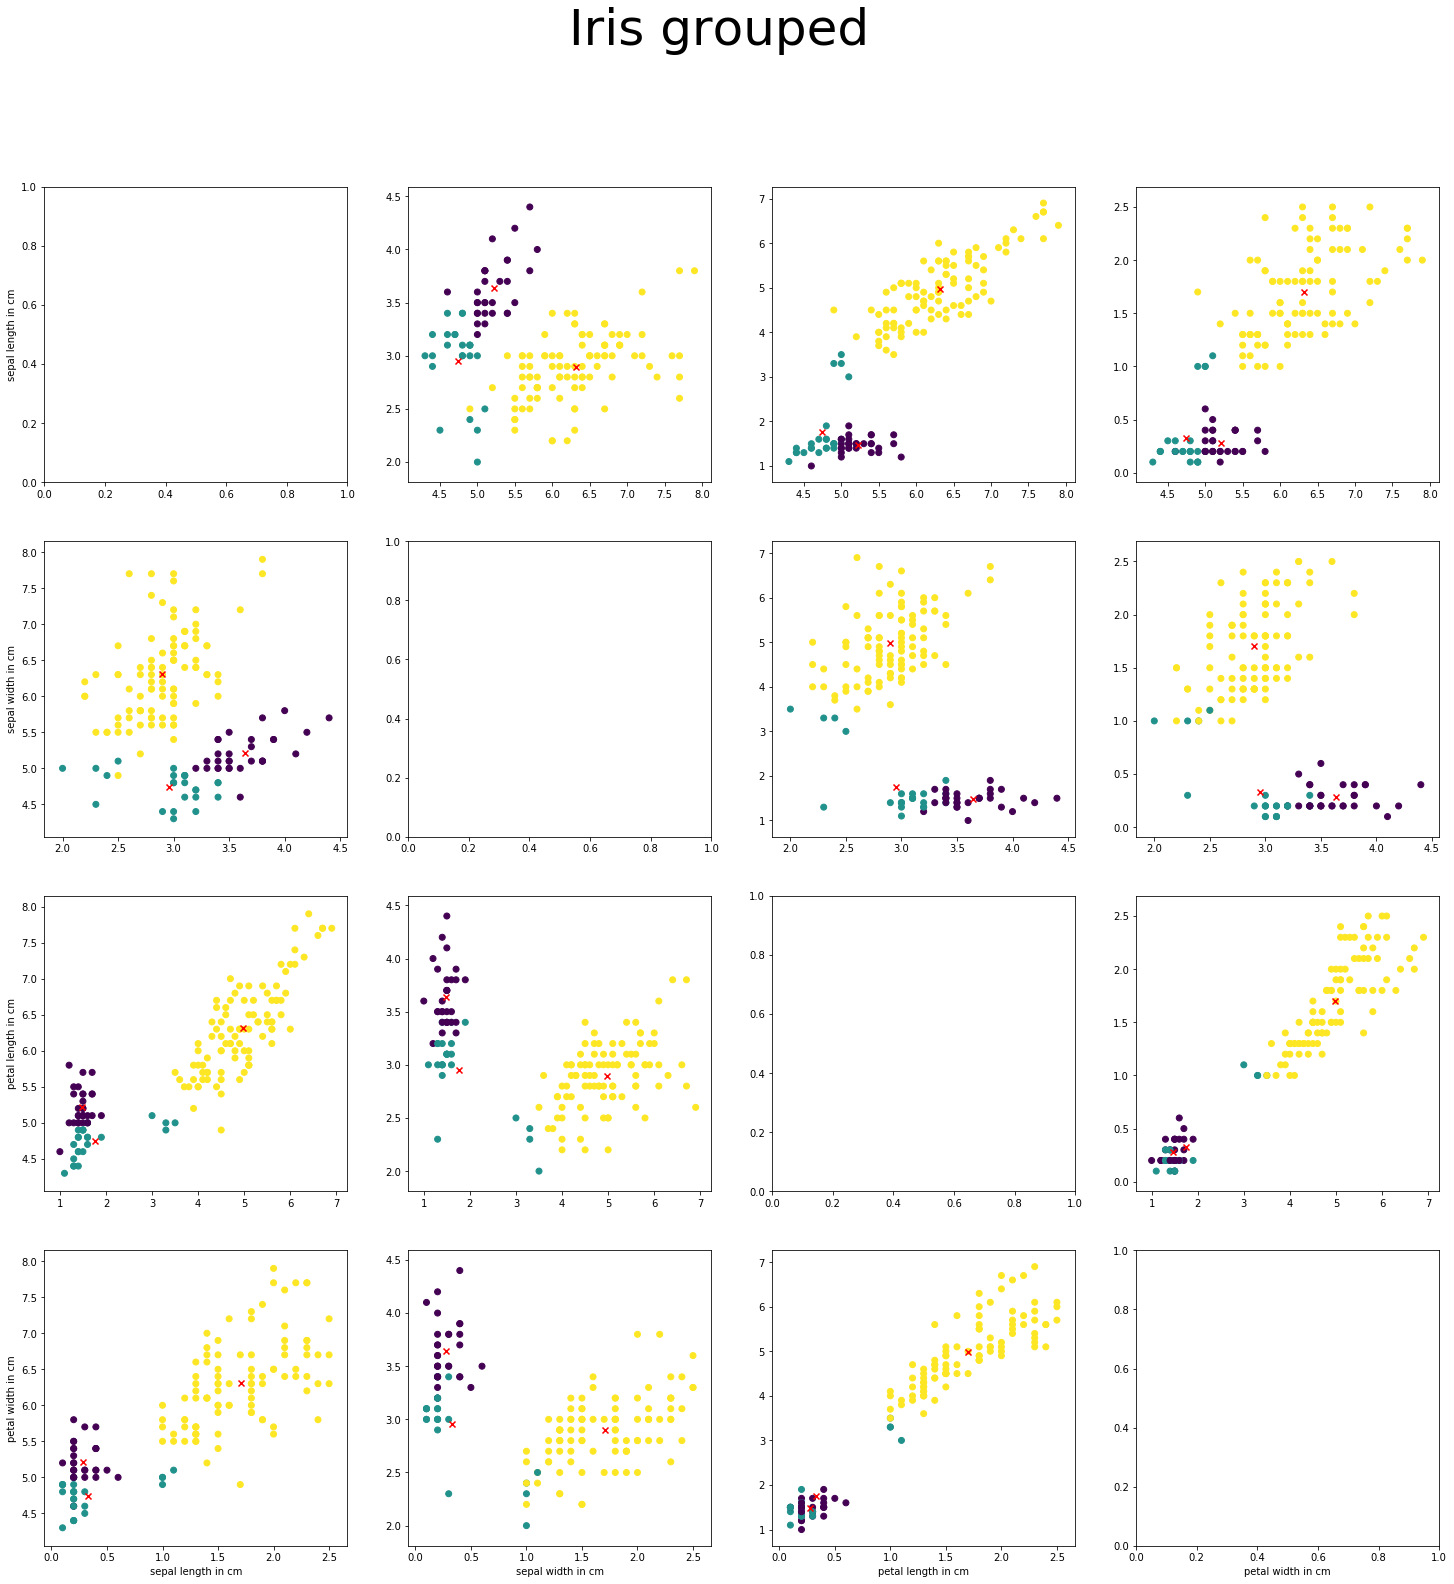

In [45]:
iris_features = {b'Iris-setosa':0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
iris_data = np.loadtxt(
    "datasets/Iris/data",
    delimiter=',',
    converters = {4: lambda x: iris_features[x]}
)
with open('datasets/Iris/index') as f:
    iris_label = np.array(f.read().split('\n'))

args = [iris_data[:, :-1], iris_data[:, -1].astype(int), iris_label, "Iris"] 
plot_data(*args)
plot_kmeans(*args)

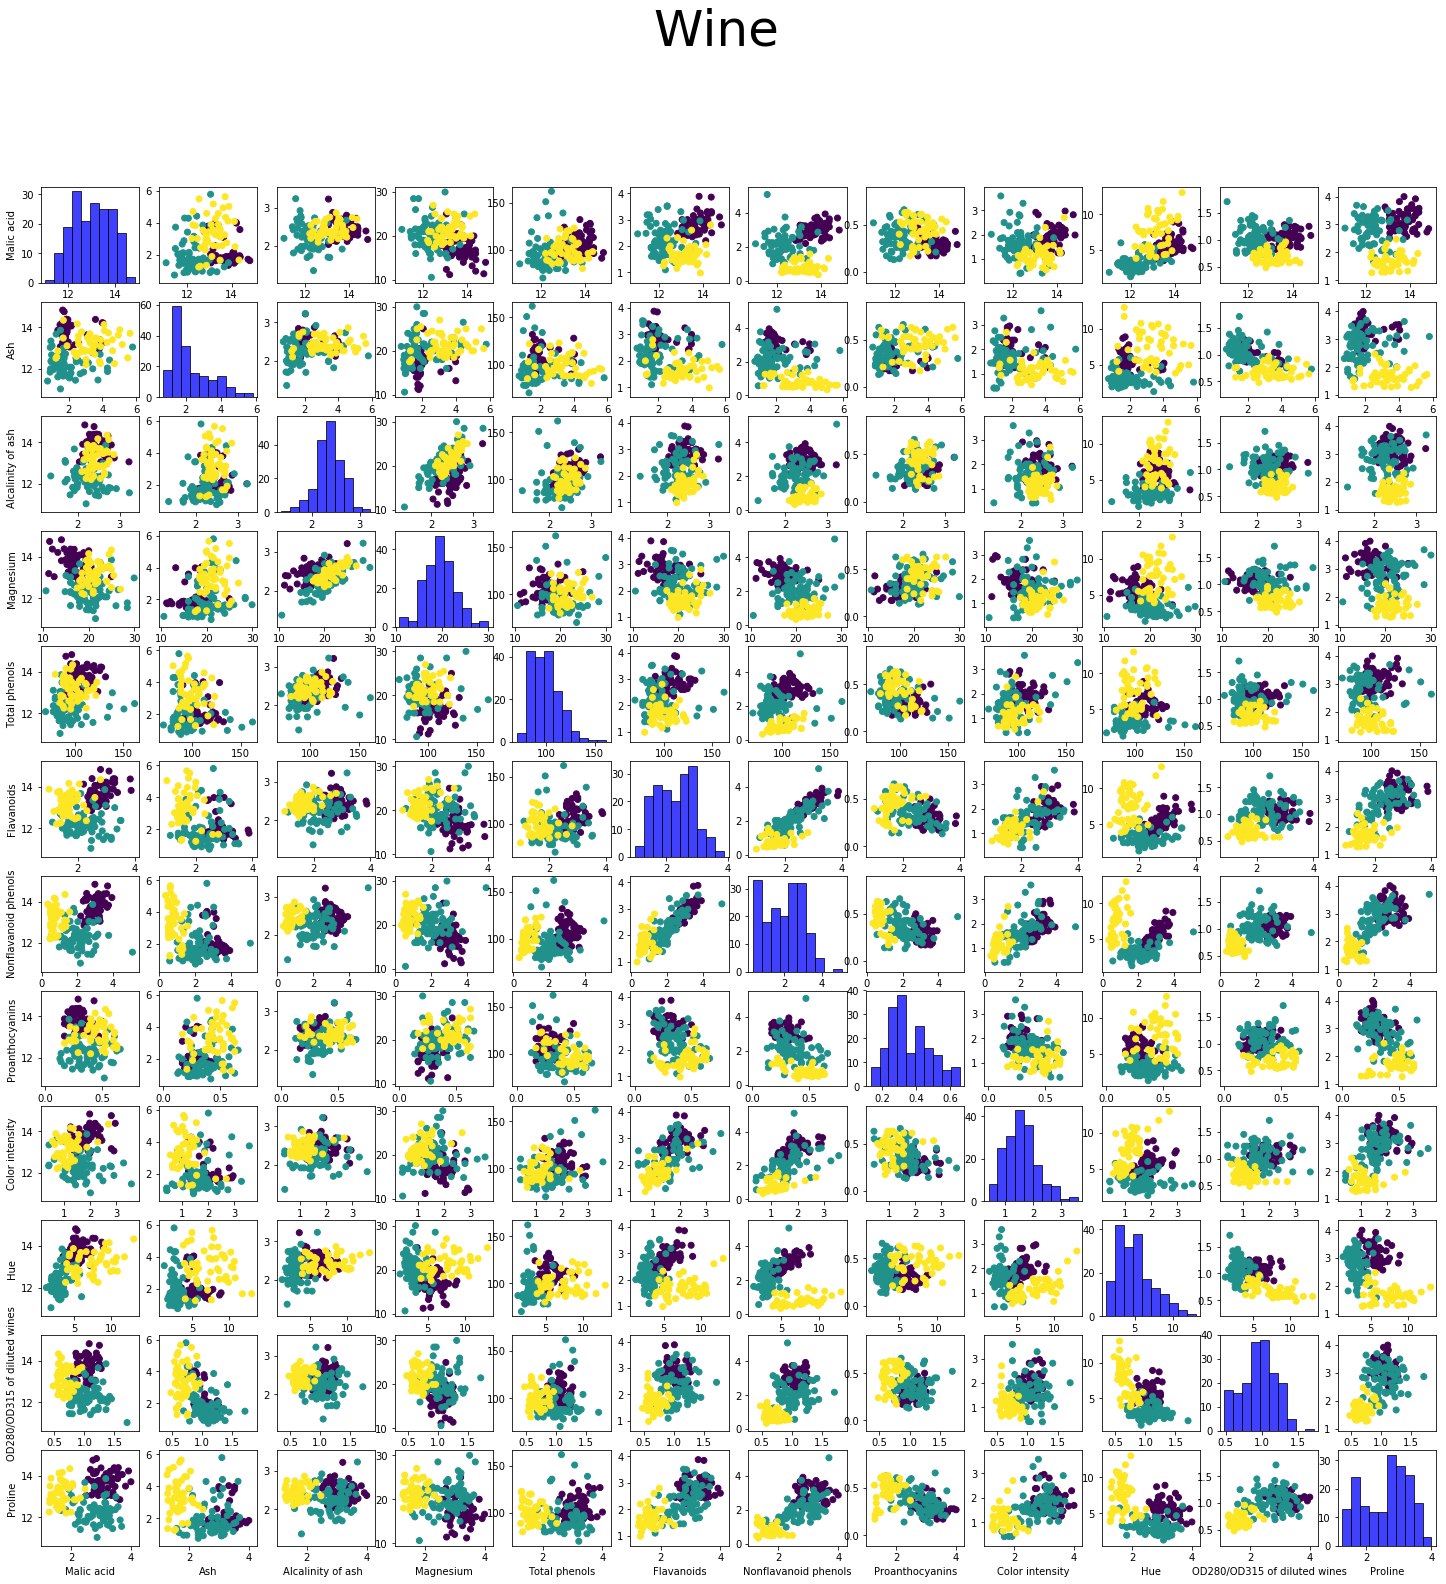

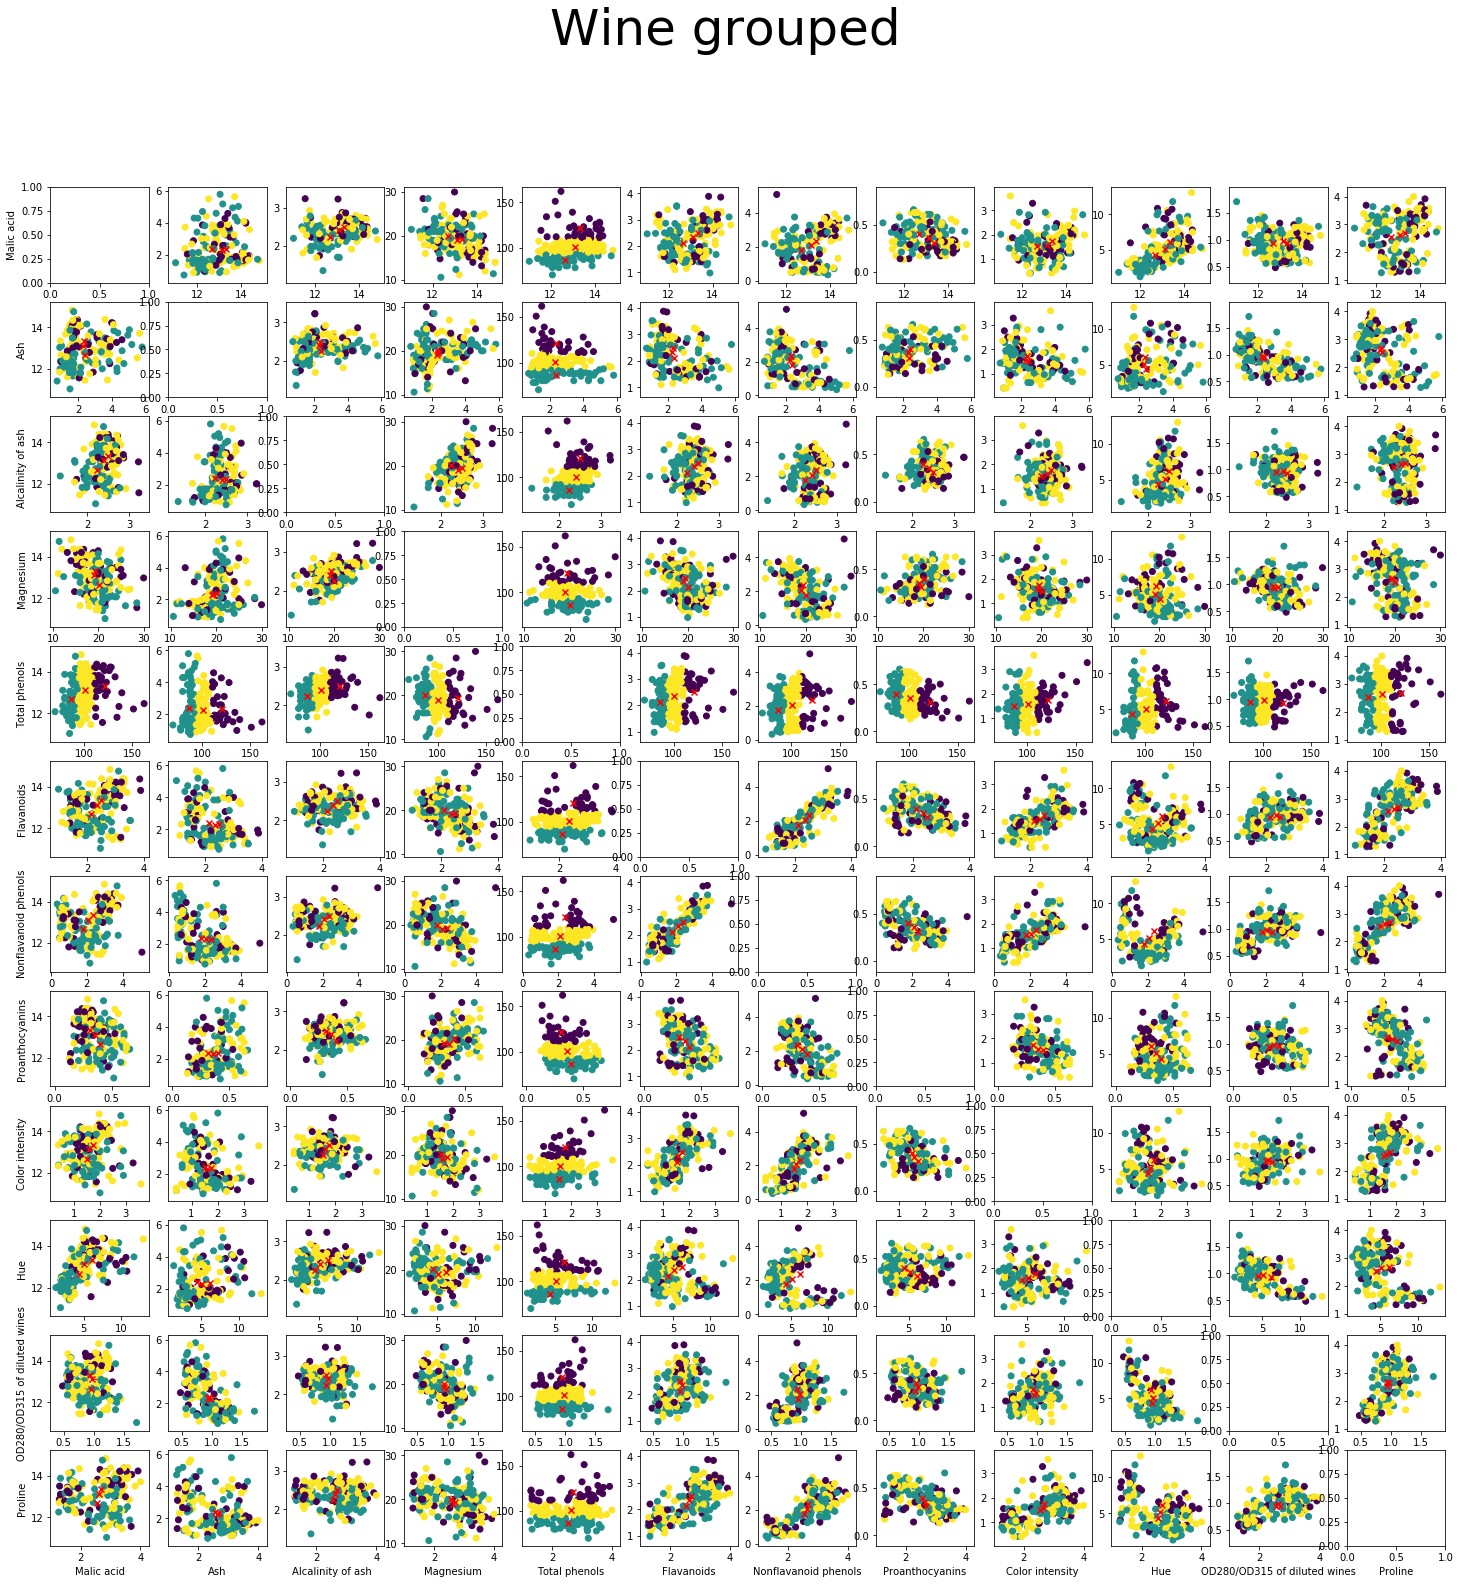

In [50]:
wine_data = np.loadtxt(
    "datasets/Wine/data",
    delimiter=','
)
with open('datasets/Wine/index') as f:
    wine_label = np.array(f.read().split('\n'))

args = [wine_data[:,1:13], wine_data[:, 0].astype(int), wine_label[1:], "Wine"] 
plot_data(*args)
plot_kmeans(*args)

(517, 13)


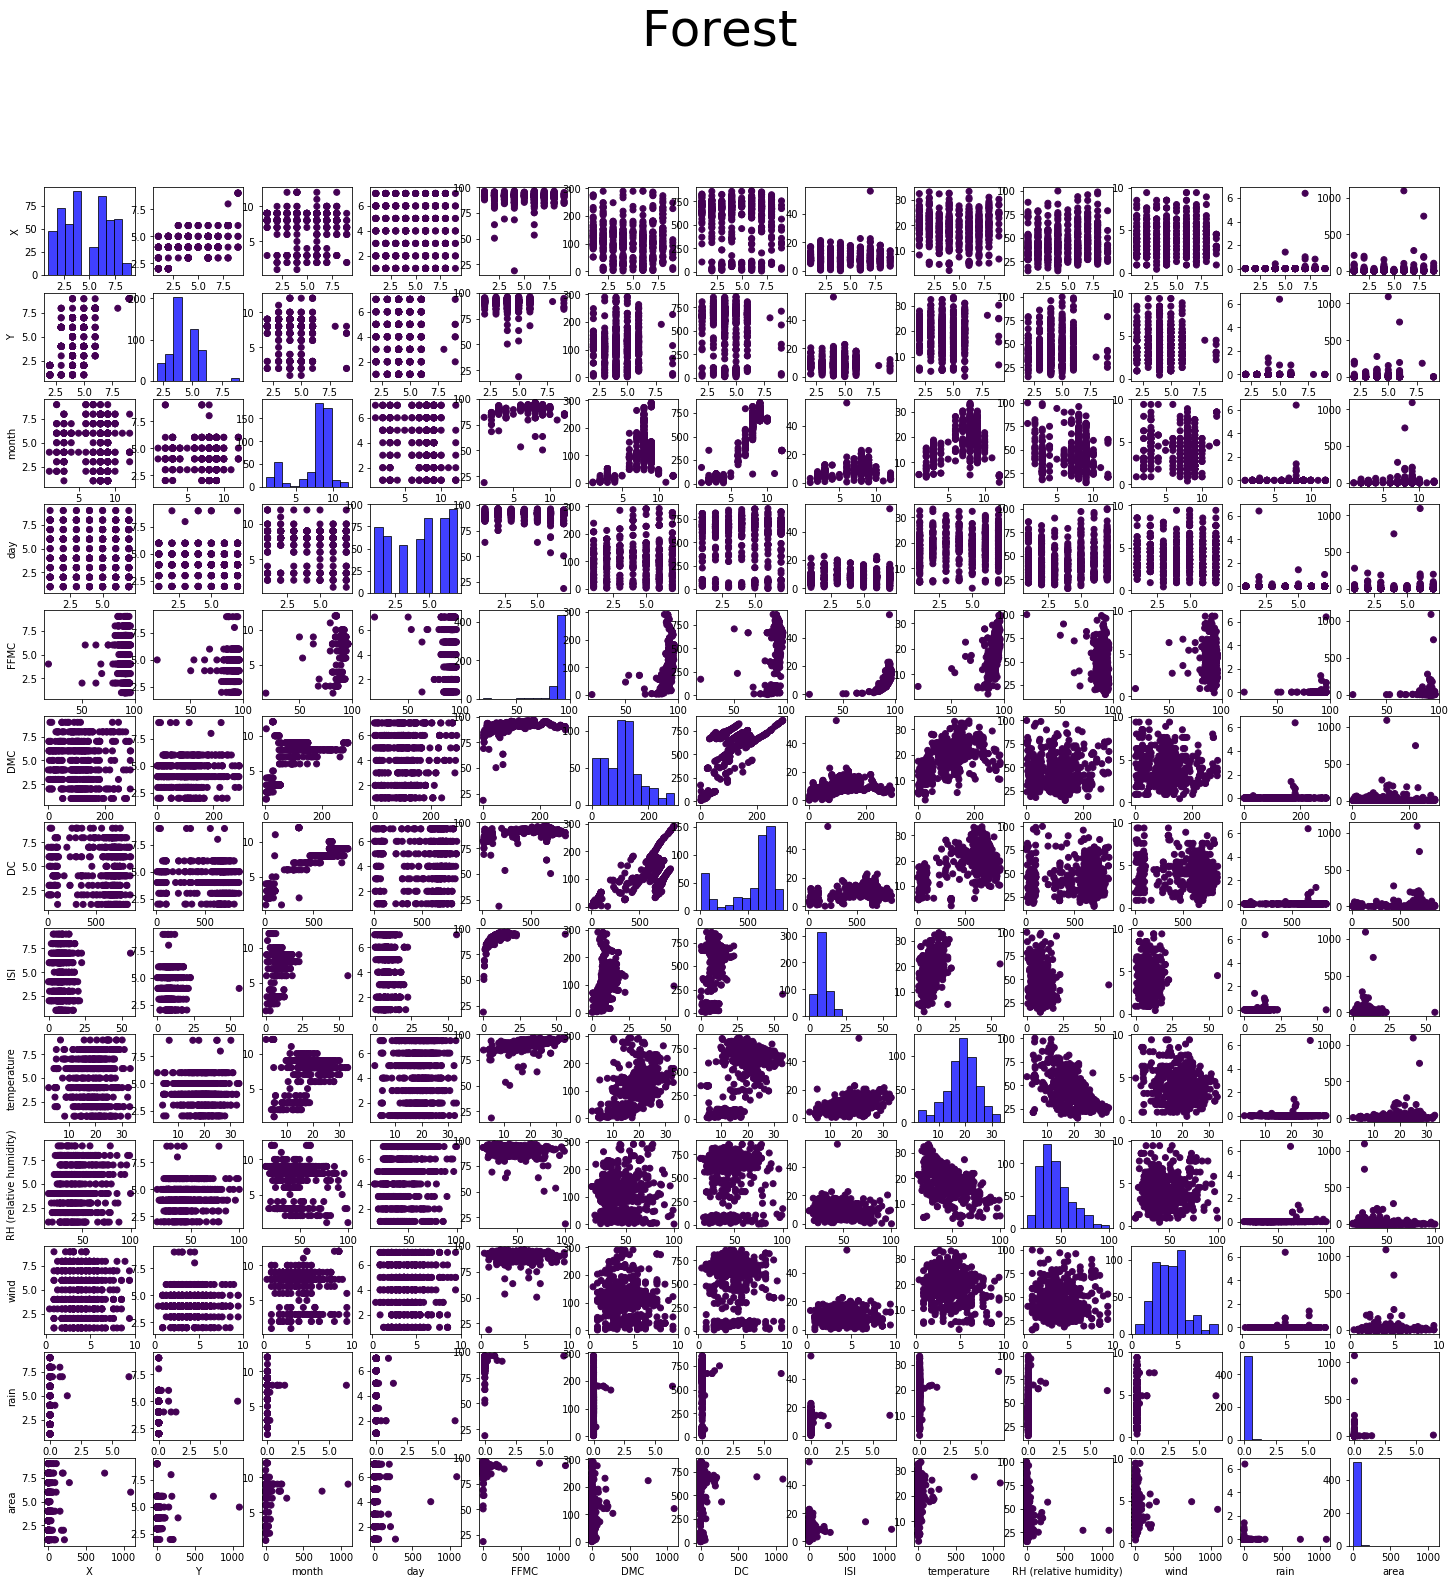

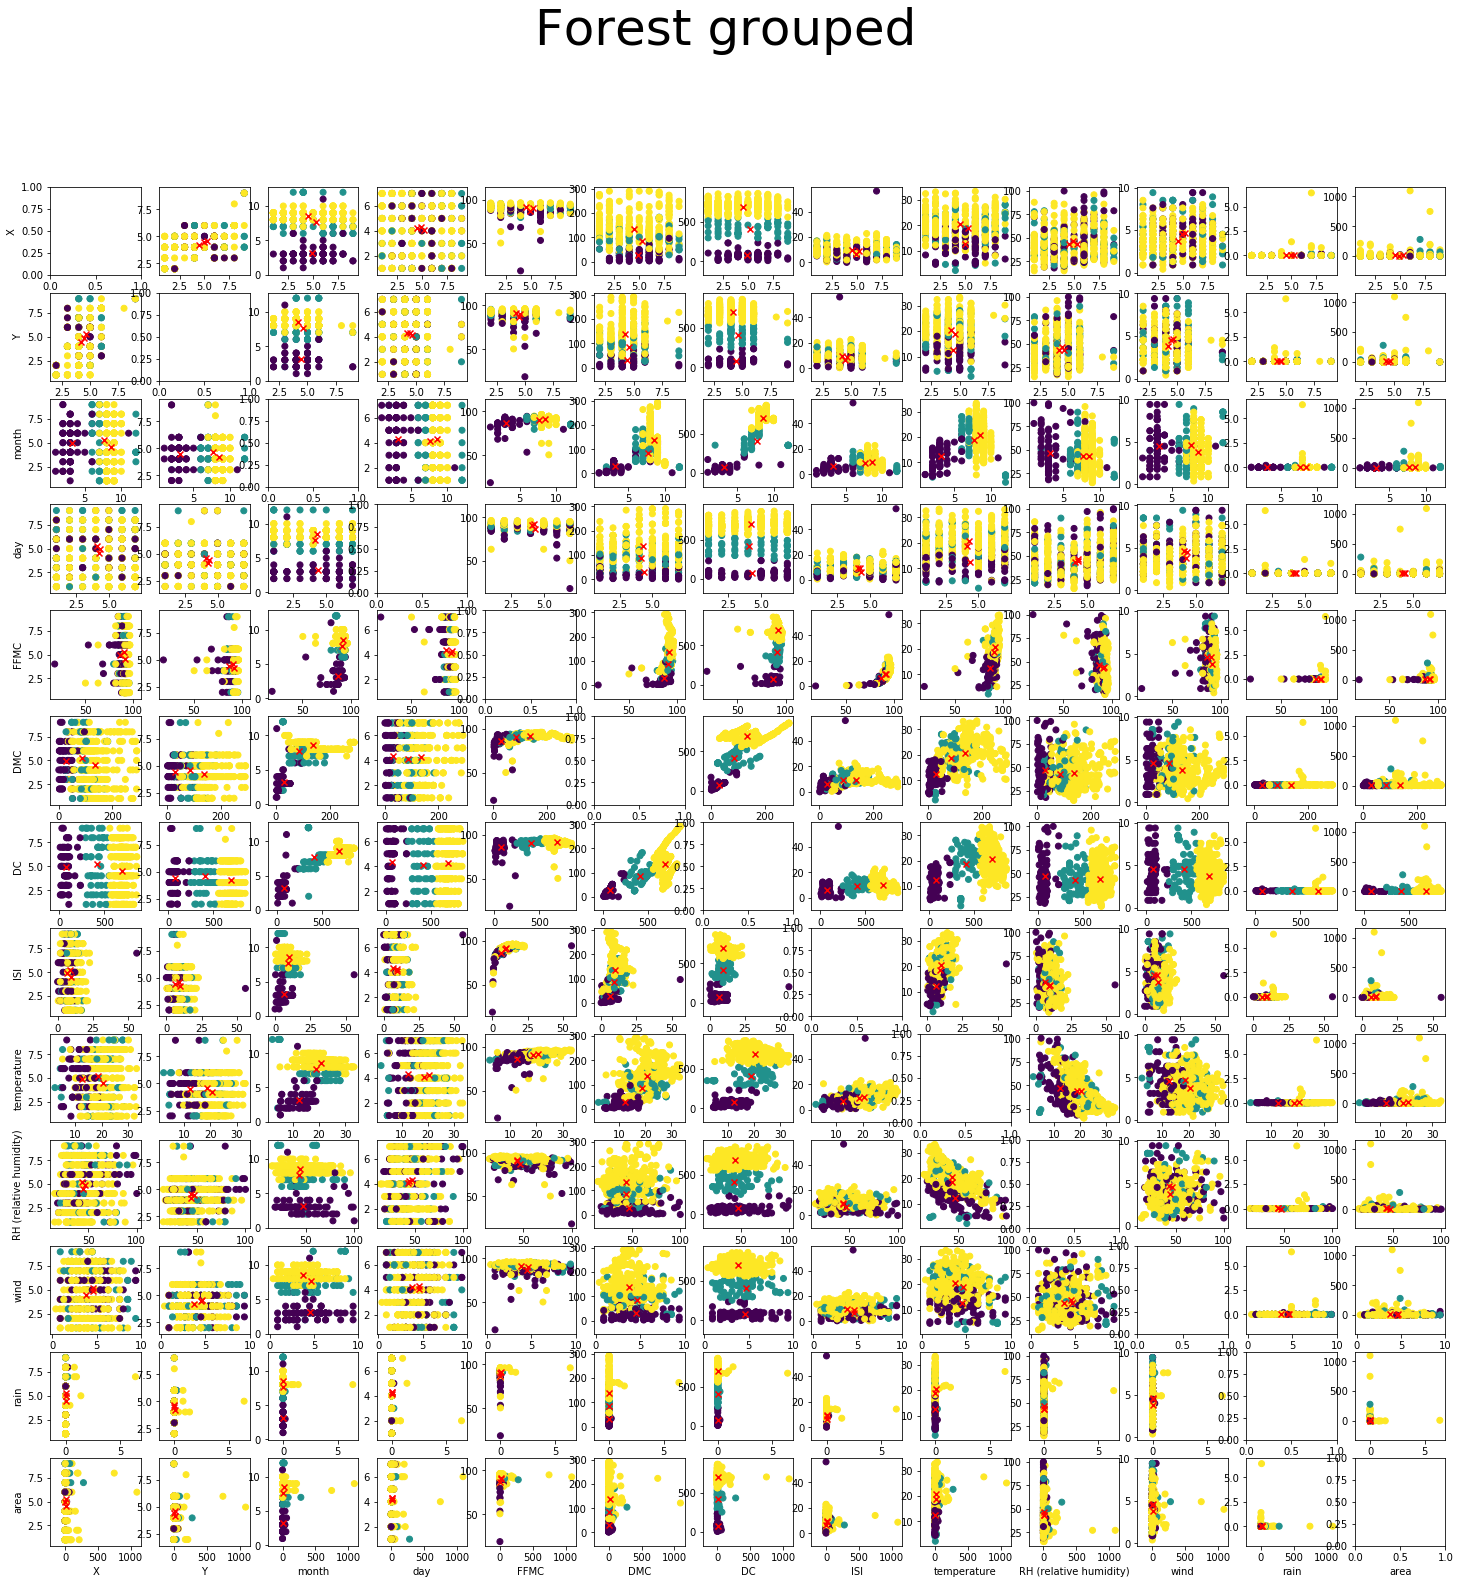

In [56]:
forestValues = {b'apr':4, b'aug':8, b'dec':12, b'feb':2, b'fri':5, b'jan':1, b'jul':7, b'jun':6, b'mar':3, b'may':5, b'mon':1, b'nov':11, b'oct':10, b'sat':6, b'sep':9, b'sun':7, b'thu':4, b'tue':2, b'wed':3}
conv_f = lambda x: forestValues[x]
forest_data = np.loadtxt(
    "datasets/Forest/data",
    delimiter=',',
    converters = {2:conv_f, 3: conv_f}
)

with open('datasets/Forest/index') as f:
    forest_label = np.array(f.read().split('\n'))

args = [forest_data[:, :13], np.zeros(forest_data.shape[0]), forest_label, "Forest"] 
plot_data(*args)
plot_kmeans(*args)

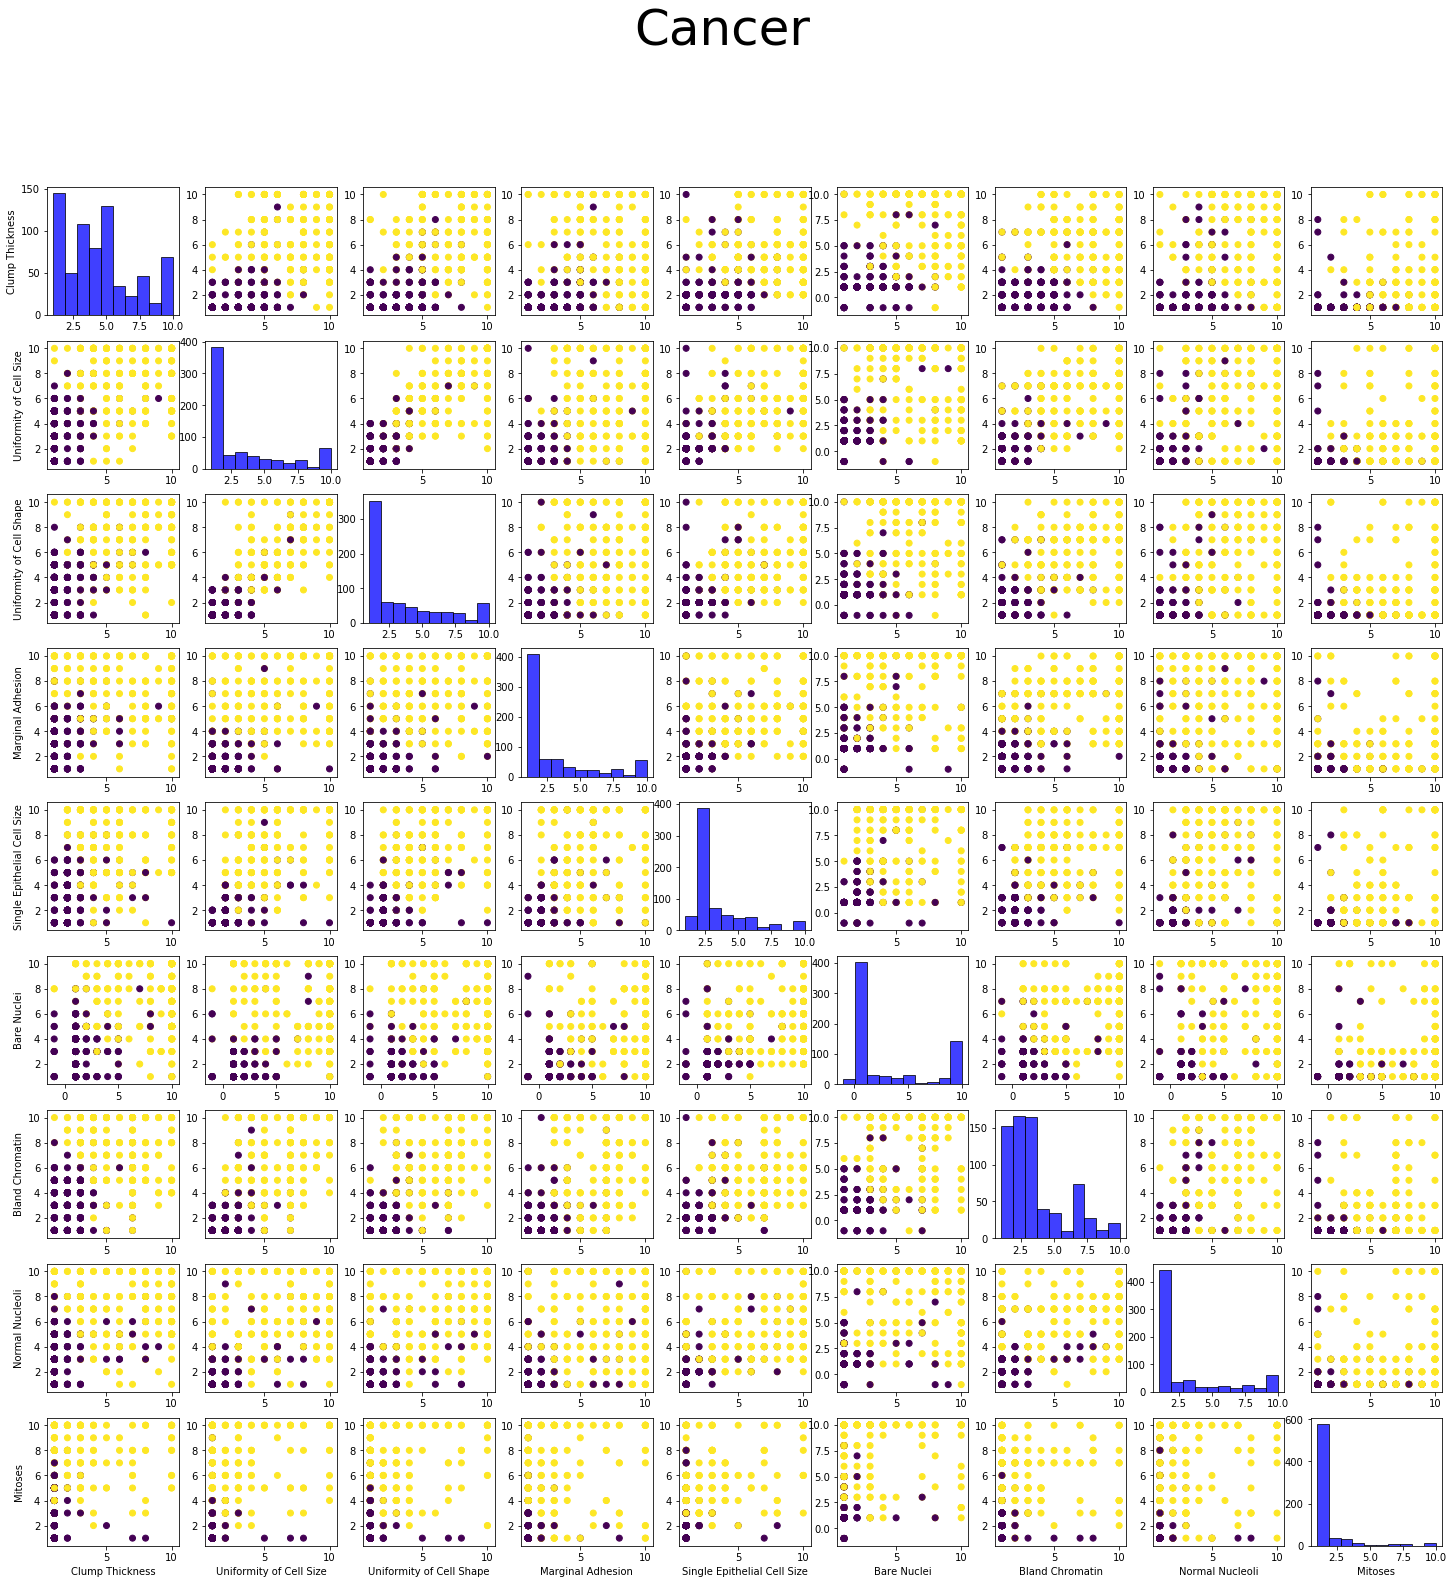

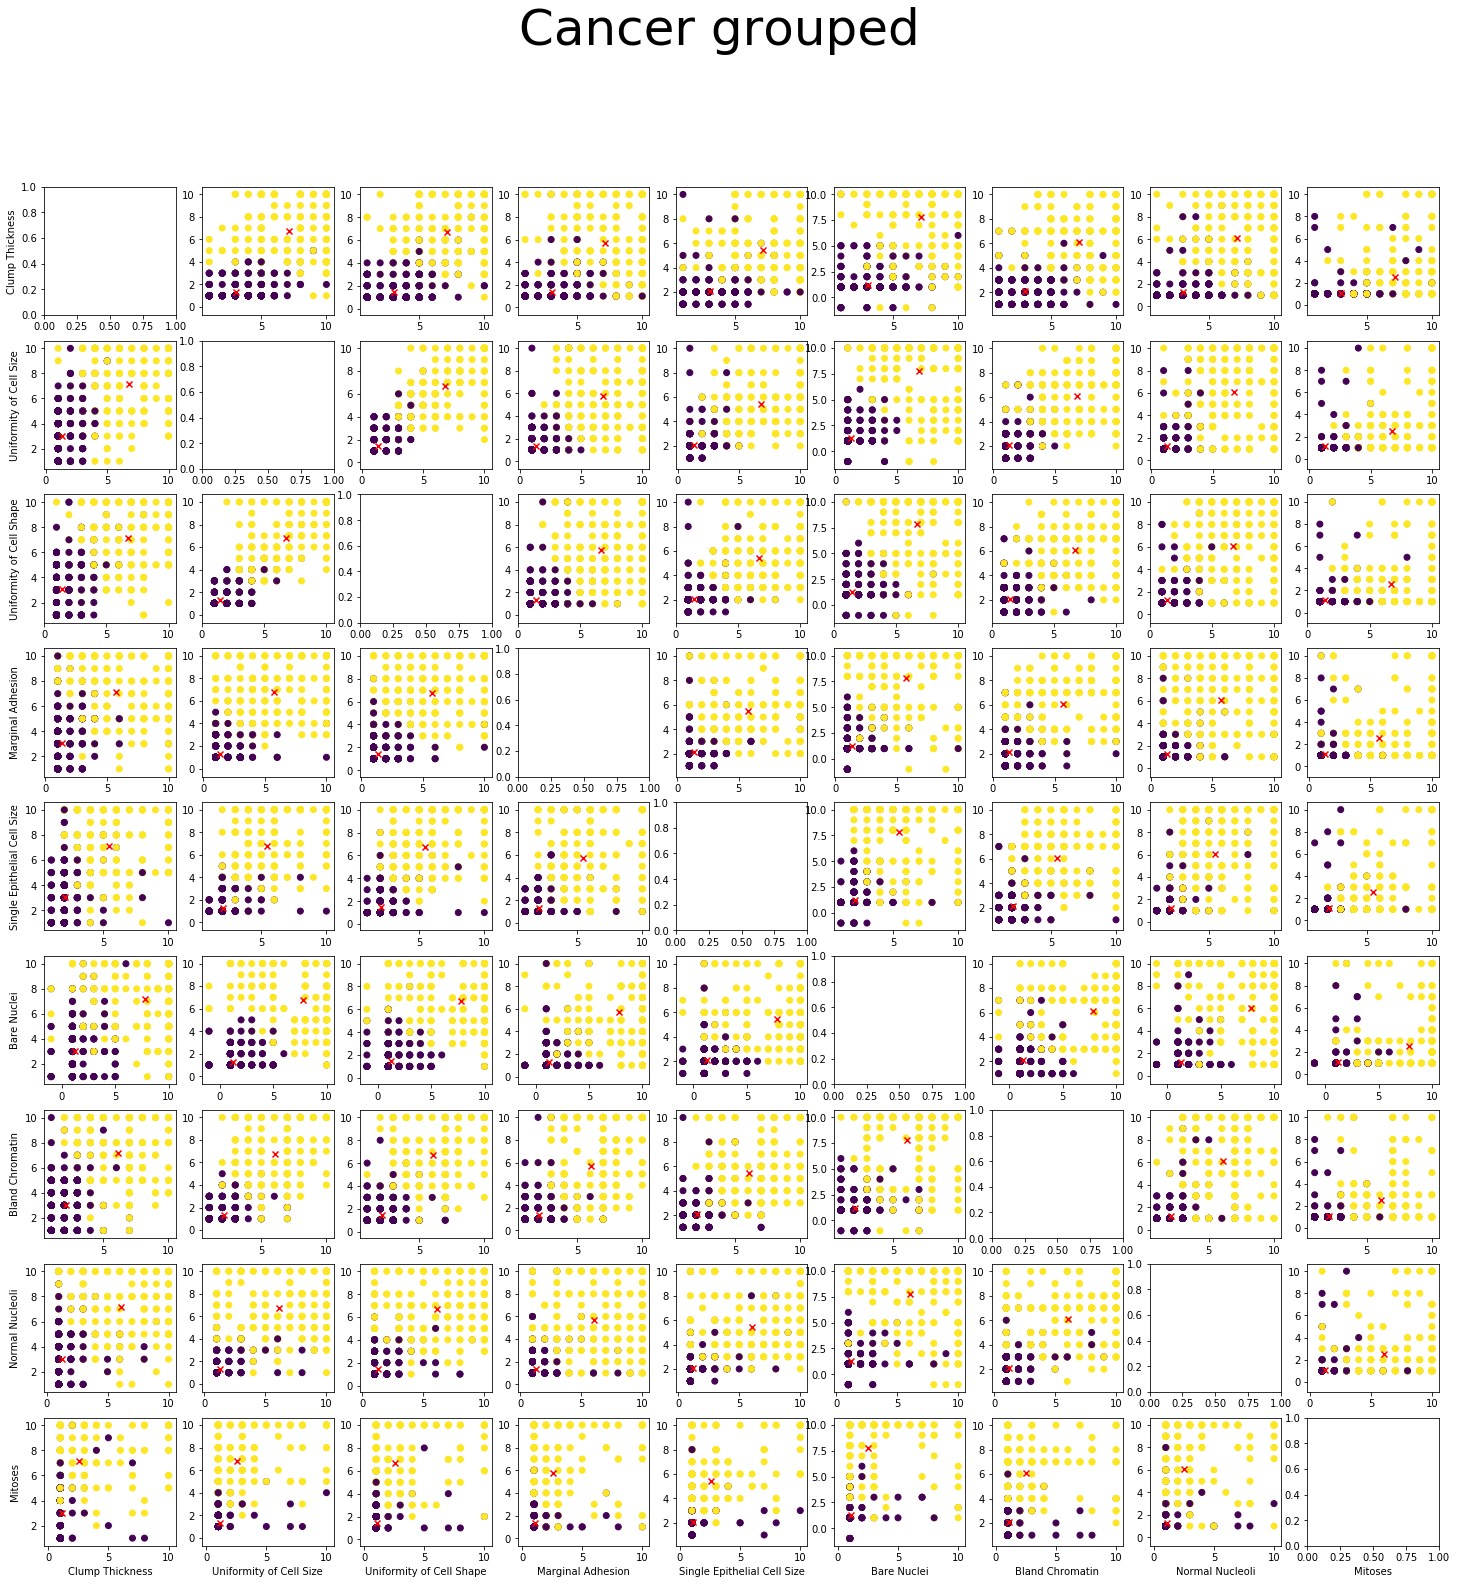

In [79]:
cancer_data = np.loadtxt(
    "datasets/Cancer/data",
    delimiter=',',
    converters={6: lambda x: -1 if x==b'?' else x}
)
with open("datasets/Cancer/index") as f:
    cancer_label = f.read().split('\n')

args = [cancer_data[:,1:10], cancer_data[:, 10], cancer_label[1:], 'Cancer']
plot_data(*args)
plot_kmeans(*args, 2)

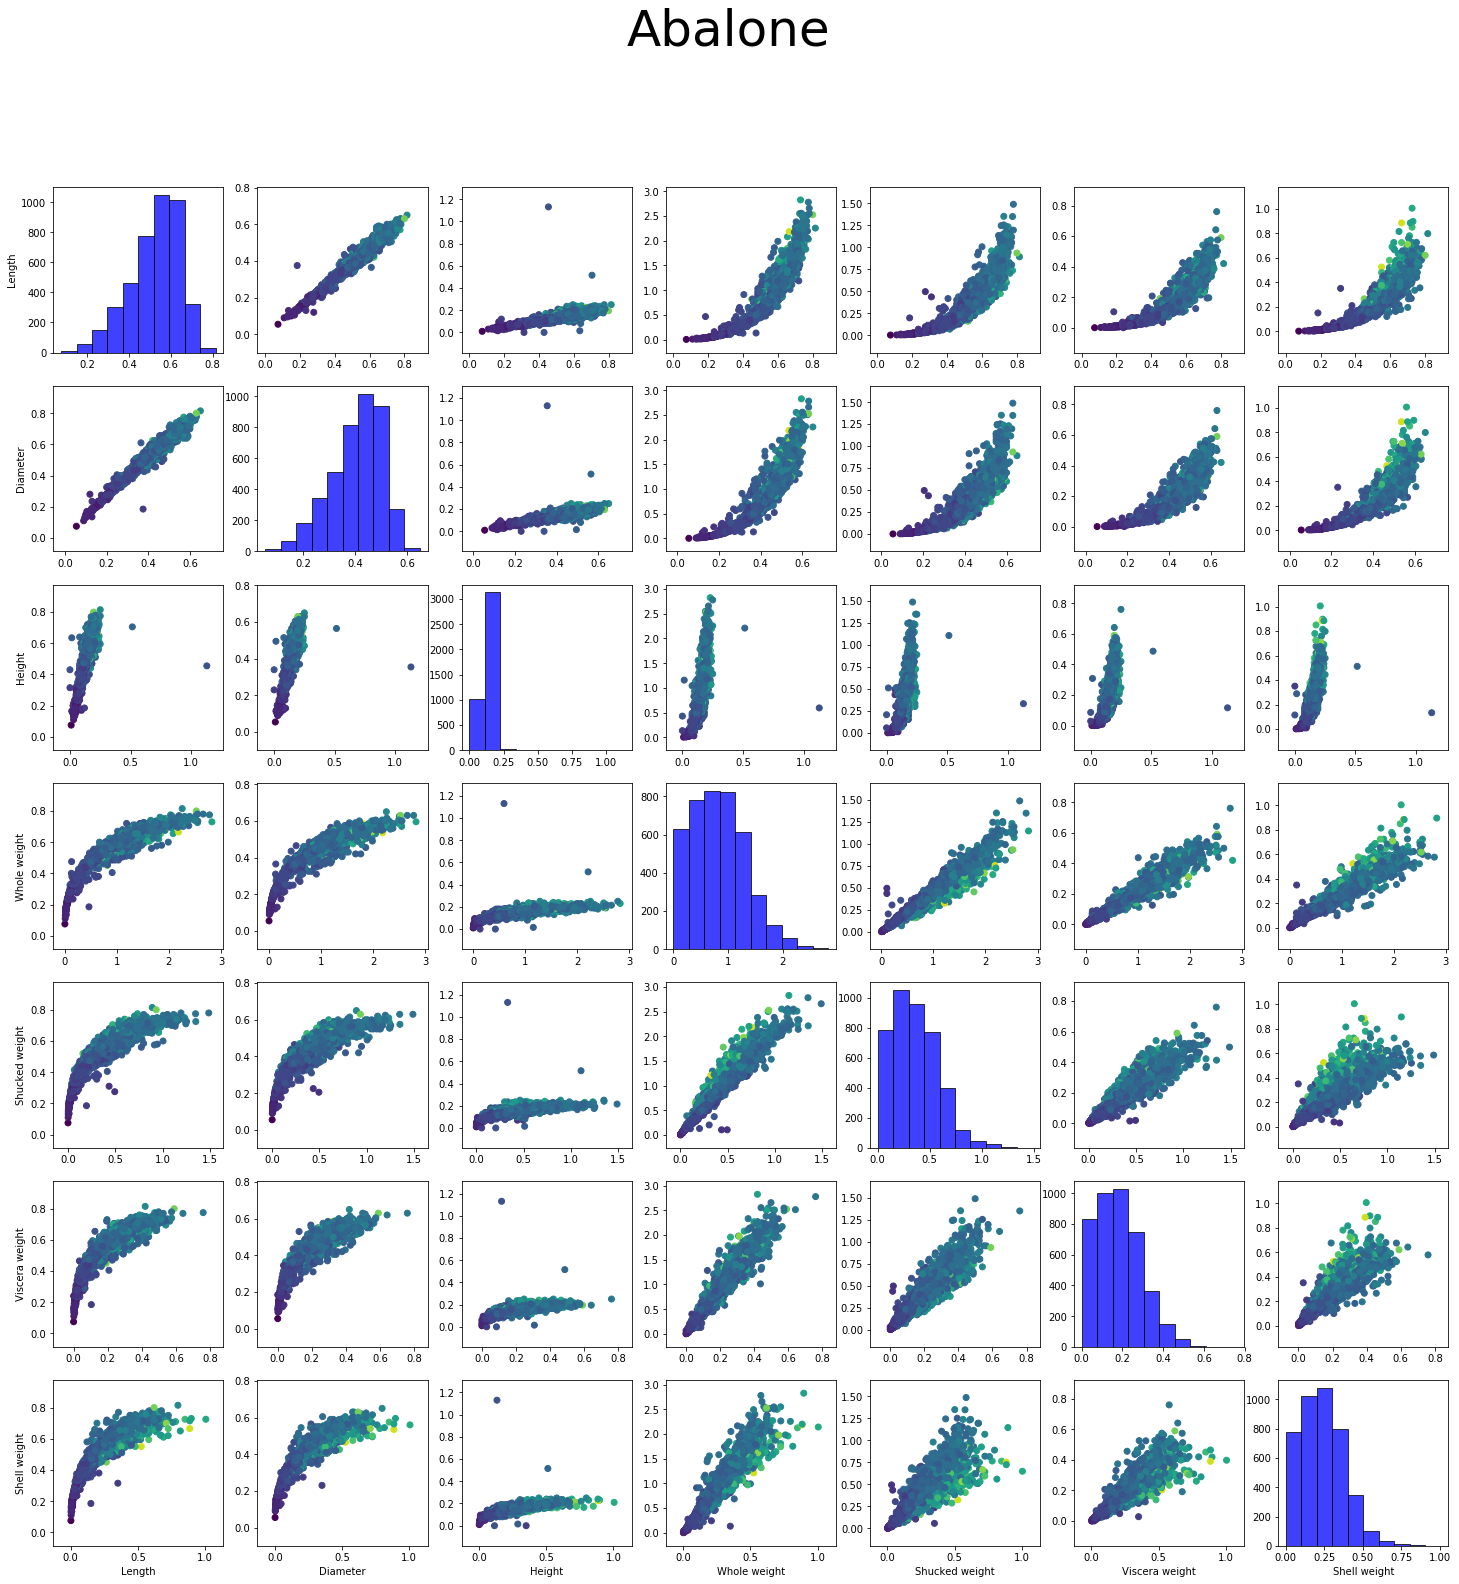

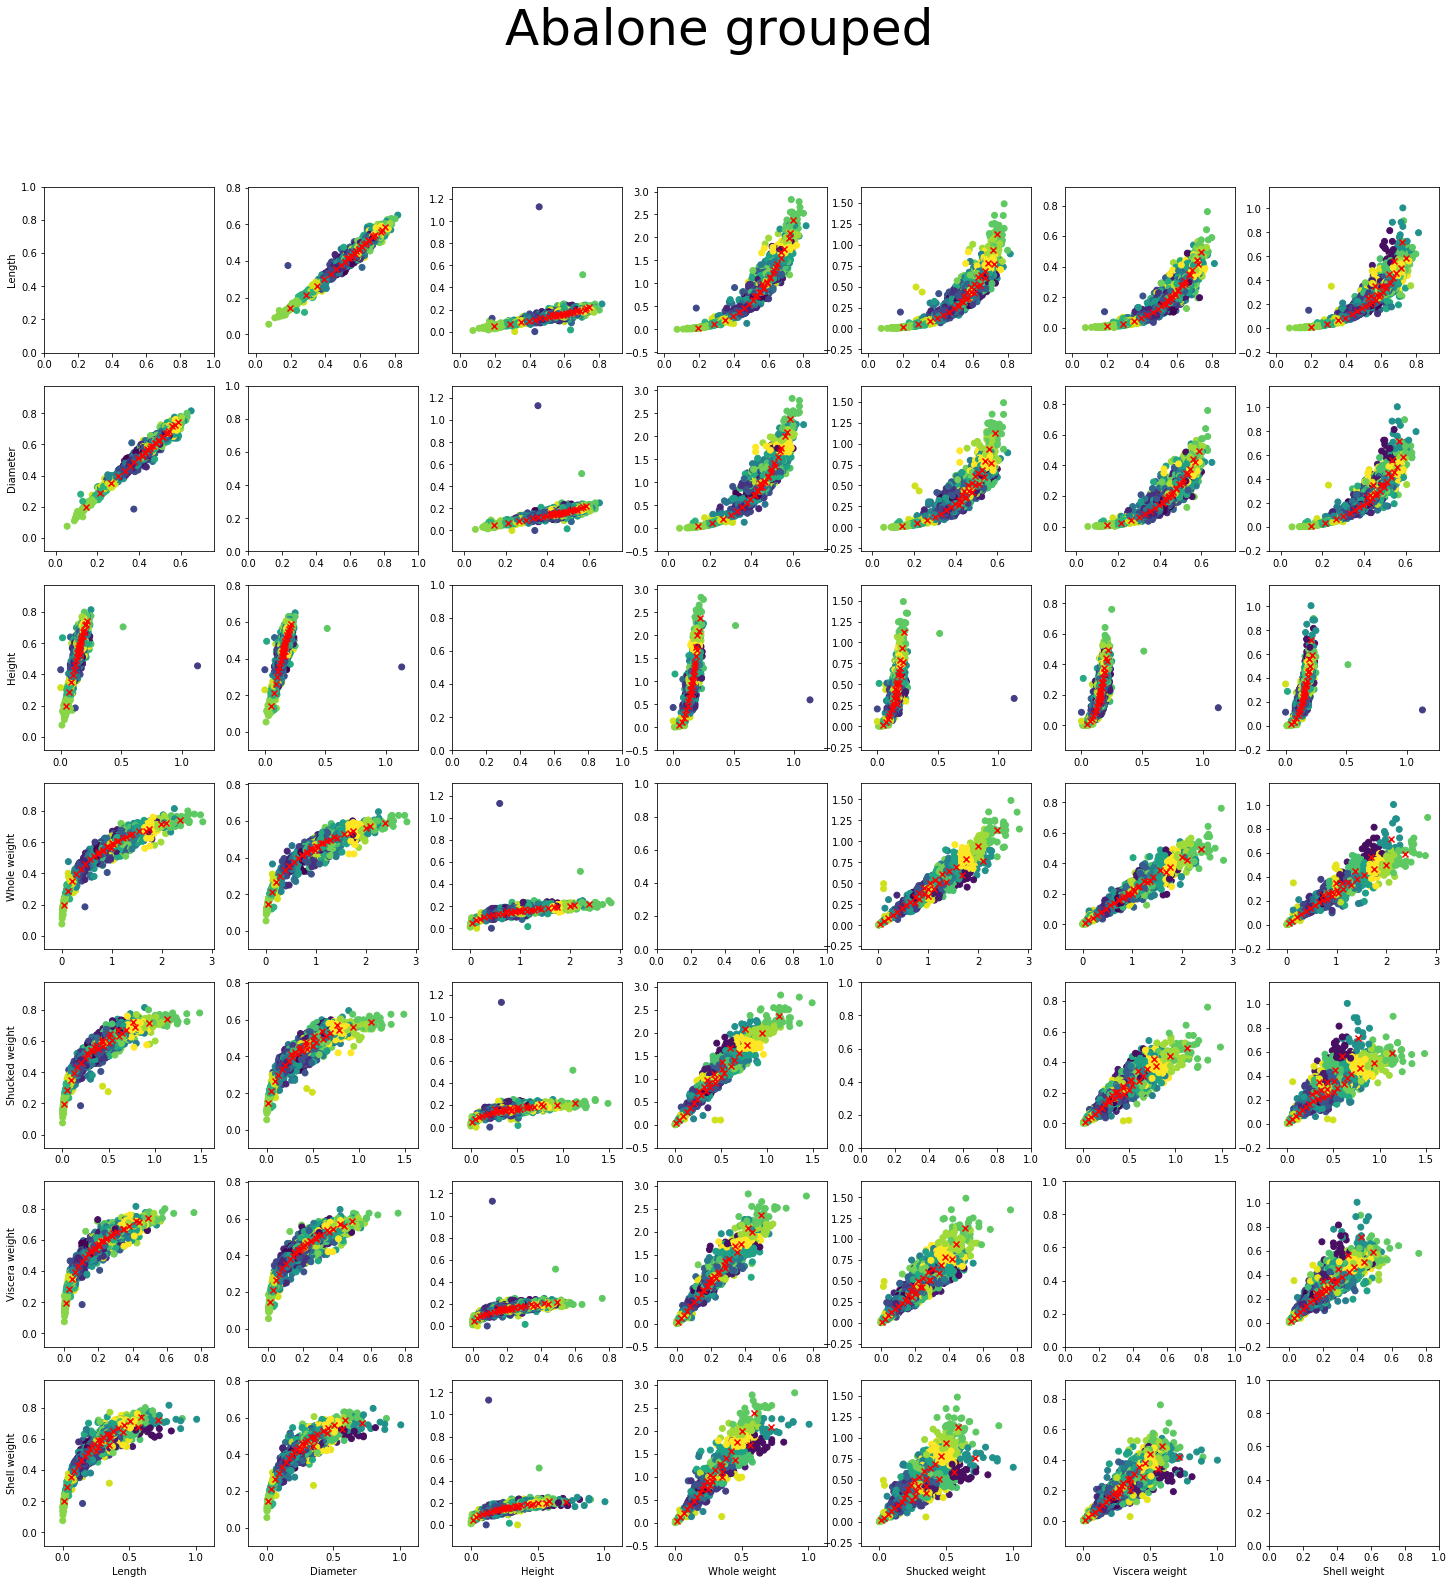

In [82]:
abalone_sex = {b'M': 0, b'F':1, b'I':2}
abalone_data = np.loadtxt(
    "datasets/Abalone/data",
    delimiter=',',
    converters={0: lambda x: abalone_sex[x]}
)

with open("datasets/Abalone/index") as f:
    abalone_label = f.read().split('\n')

args = [abalone_data[:,1:8], abalone_data[:, 8], abalone_label[1:], 'Abalone']
plot_data(*args)
plot_kmeans(*args, 29)